<a href="https://colab.research.google.com/github/Karthisk1994/Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Python Libraries and reading the data**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import plotly.express as px

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from textblob import TextBlob

In [7]:
df = pd.read_csv('/content/netflix_titles.csv')

In [8]:
df.shape

(8807, 12)

In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
x=df.groupby(['rating']).size().reset_index(name='counts')

**Content Ratings & Counts**

In [15]:
Contents = px.pie(x, values='counts', names='rating', title='Content Ratings Distribution')
Contents.show()

In [16]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count Vs Type of Shows')

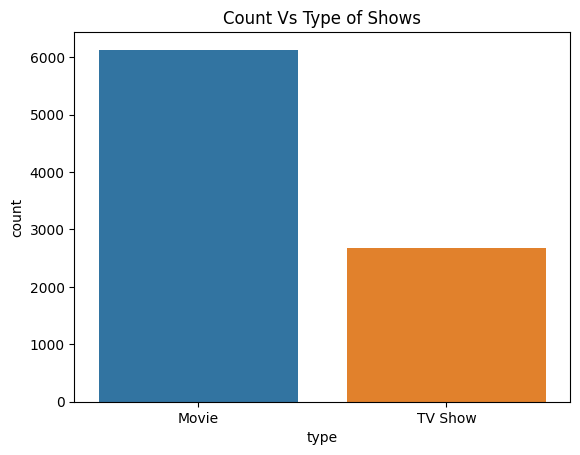

In [17]:
sns.countplot(x='type', data = df)
plt.title('Count Vs Type of Shows')

# **Country Analysis**

In [18]:
df['country'].value_counts().head()

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [19]:
df['country'].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

Text(0.5, 1.0, 'Country Wise Contents on Netflix')

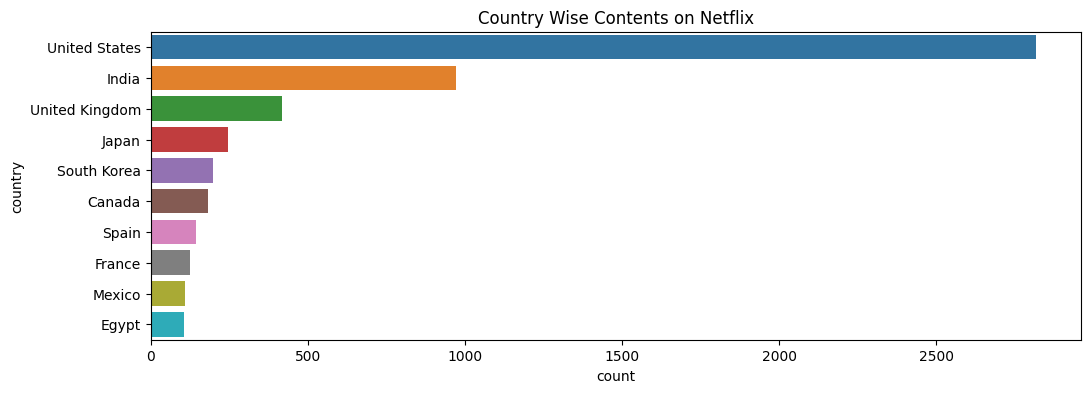

In [20]:
plt.figure(figsize = (12,4))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10], data =df)
plt.title('Country Wise Contents on Netflix')

In [21]:
movie_countries = df[df['type']=='Movie']
tv_show_countries = df[df['type']=='TV Show']

Text(0.5, 1.0, 'Top 10 countries producing movies in Netflix')

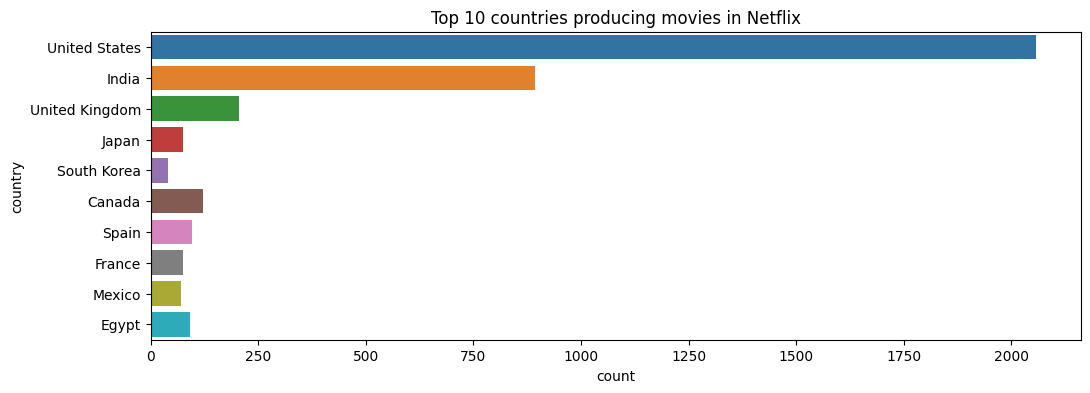

In [22]:
plt.figure(figsize = (12,4))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10], data =movie_countries)
plt.title('Top 10 countries producing movies in Netflix')

Text(0.5, 1.0, 'Top 10 countries producing TV shows in Netflix')

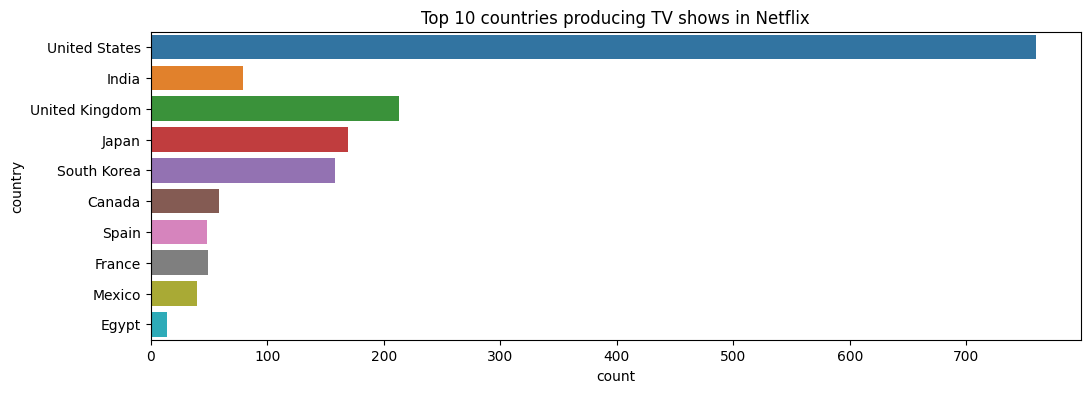

In [23]:
plt.figure(figsize = (12,4))
sns.countplot(y='country', order = df['country'].value_counts().index[0:10], data =tv_show_countries)
plt.title('Top 10 countries producing TV shows in Netflix')

# **Directors Analysis**

**Replacing the Null/Na Values from the DataFrame**

In [24]:
df['director']=df['director'].fillna('Director name not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director name not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director name not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director name not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
directors_list= pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [26]:
directors_list= df['director'].str.split(',', expand = True).stack()
print(directors_list)

0     0                Kirsten Johnson
1     0    Director name not specified
2     0                Julien Leclercq
3     0    Director name not specified
4     0    Director name not specified
                      ...             
8802  0                  David Fincher
8803  0    Director name not specified
8804  0                Ruben Fleischer
8805  0                   Peter Hewitt
8806  0                    Mozez Singh
Length: 9612, dtype: object


In [27]:
directors_list = directors_list.to_frame()
print(directors_list)

                                  0
0    0              Kirsten Johnson
1    0  Director name not specified
2    0              Julien Leclercq
3    0  Director name not specified
4    0  Director name not specified
...                             ...
8802 0                David Fincher
8803 0  Director name not specified
8804 0              Ruben Fleischer
8805 0                 Peter Hewitt
8806 0                  Mozez Singh

[9612 rows x 1 columns]


In [28]:
directors_list.columns = ['Director']
print(directors_list)

                           Director
0    0              Kirsten Johnson
1    0  Director name not specified
2    0              Julien Leclercq
3    0  Director name not specified
4    0  Director name not specified
...                             ...
8802 0                David Fincher
8803 0  Director name not specified
8804 0              Ruben Fleischer
8805 0                 Peter Hewitt
8806 0                  Mozez Singh

[9612 rows x 1 columns]


In [29]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Count of Contents')
print(directors)

                       Director  Count of Contents
0                Aaron Moorhead                  2
1                   Aaron Woolf                  1
2      Abbas Alibhai Burmawalla                  1
3              Abdullah Al Noor                  1
4           Abhinav Shiv Tiwari                  1
...                         ...                ...
5116                Çagan Irmak                  1
5117           Ísold Uggadóttir                  1
5118        Óskar Thór Axelsson                  1
5119           Ömer Faruk Sorak                  2
5120               Şenol Sönmez                  2

[5121 rows x 2 columns]


In [30]:
directors = directors[directors.Director != 'Director name not specified']
print(directors)

                       Director  Count of Contents
0                Aaron Moorhead                  2
1                   Aaron Woolf                  1
2      Abbas Alibhai Burmawalla                  1
3              Abdullah Al Noor                  1
4           Abhinav Shiv Tiwari                  1
...                         ...                ...
5116                Çagan Irmak                  1
5117           Ísold Uggadóttir                  1
5118        Óskar Thór Axelsson                  1
5119           Ömer Faruk Sorak                  2
5120               Şenol Sönmez                  2

[5120 rows x 2 columns]


In [31]:
directors = directors.sort_values(by = ['Count of Contents'], ascending = False)
print(directors)

             Director  Count of Contents
4021    Rajiv Chilaka                 22
4068      Raúl Campos                 18
261         Jan Suter                 18
4652      Suhas Kadav                 16
3236     Marcus Raboy                 16
...               ...                ...
2341         J. Davis                  1
2342  J. Lee Thompson                  1
2343  J. Michael Long                  1
609    Smriti Keshari                  1
2561    Joaquín Mazón                  1

[5120 rows x 2 columns]


In [32]:
Top5Directors = directors.head()
print(Top5Directors)

           Director  Count of Contents
4021  Rajiv Chilaka                 22
4068    Raúl Campos                 18
261       Jan Suter                 18
4652    Suhas Kadav                 16
3236   Marcus Raboy                 16


In [33]:
Bottom5Directors = directors.tail()
print(Bottom5Directors)

             Director  Count of Contents
2341         J. Davis                  1
2342  J. Lee Thompson                  1
2343  J. Michael Long                  1
609    Smriti Keshari                  1
2561    Joaquín Mazón                  1


**Top 5 Directors on Netflix**

In [34]:
Top5Directors = Top5Directors.sort_values(by=['Count of Contents'])
DirectorContents= px.bar(Top5Directors, x = 'Count of Contents', y= 'Director', title = 'Top 5 Directors on Netflix')
DirectorContents.show()

# **Actors Analysis**

**Replacing the Null/Na Values in the DataFrame**

In [35]:
df['cast']=df['cast'].fillna('No Cast Specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director name not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director name not specified,No Cast Specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director name not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
cast_df = pd.DataFrame()
print(cast_df)

Empty DataFrame
Columns: []
Index: []


In [37]:
cast_df = df['cast'].str.split(',',expand = True).stack()
print(cast_df)

0     0         No Cast Specified
1     0                Ama Qamata
      1               Khosi Ngema
      2             Gail Mabalane
      3            Thabang Molaba
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 64951, dtype: object


In [38]:
cast_df = cast_df.to_frame()
print(cast_df)

                             0
0    0       No Cast Specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]


In [39]:
cast_df.columns = ['Actor']
print(cast_df)

                         Actor
0    0       No Cast Specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]


In [40]:
actors=cast_df.groupby(['Actor']).size().reset_index(name= 'Count of Contents')
print(actors)

                        Actor  Count of Contents
0                         Jr.                  2
1       "Riley" Lakdhar Dridi                  1
2                'Najite Dede                  1
3                    2 Chainz                  1
4                        2Mex                  1
...                       ...                ...
39292         İbrahim Büyükak                  1
39293        İbrahim Çelikkol                  1
39294             Şahin Irmak                  1
39295          Şükrü Özyıldız                  1
39296            Ṣọpẹ́ Dìrísù                  1

[39297 rows x 2 columns]


In [41]:
actors=actors[actors.Actor != 'No cast specified']
print(actors)

                        Actor  Count of Contents
0                         Jr.                  2
1       "Riley" Lakdhar Dridi                  1
2                'Najite Dede                  1
3                    2 Chainz                  1
4                        2Mex                  1
...                       ...                ...
39292         İbrahim Büyükak                  1
39293        İbrahim Çelikkol                  1
39294             Şahin Irmak                  1
39295          Şükrü Özyıldız                  1
39296            Ṣọpẹ́ Dìrísù                  1

[39297 rows x 2 columns]


In [42]:
actors=actors.sort_values(by=['Count of Contents'], ascending = False)
print(actors)

                    Actor  Count of Contents
37649   No Cast Specified                825
2612          Anupam Kher                 39
26941        Rupa Bhimani                 31
30303    Takahiro Sakurai                 30
15541       Julie Tejwani                 28
...                   ...                ...
15291   João Fábio Cabral                  1
15290         João Côrtes                  1
15289       João Assunção                  1
15288      Joziah Lagonoy                  1
39296        Ṣọpẹ́ Dìrísù                  1

[39297 rows x 2 columns]


In [43]:
Top5Actors=actors.head()
print(Top5Actors)

                   Actor  Count of Contents
37649  No Cast Specified                825
2612         Anupam Kher                 39
26941       Rupa Bhimani                 31
30303   Takahiro Sakurai                 30
15541      Julie Tejwani                 28


**Top 5 Actors on Netflix**

In [44]:
Top5Actors=Top5Actors.sort_values(by=['Count of Contents'])
ActorContents = px.bar(Top5Actors, x = 'Count of Contents', y= 'Actor', title = 'Top 5 Actors on Netflix')
ActorContents.show()

# **Contents Analysis based on Years**

In [45]:
df1 = df[['type', 'release_year']]
df1=df1.rename(columns={"release_year":"Release Year",'type':'Type'})
df2=df1.groupby(['Release Year','Type']).size().reset_index(name='Count of Contents')

In [46]:
print(df2)

     Release Year     Type  Count of Contents
0            1925  TV Show                  1
1            1942    Movie                  2
2            1943    Movie                  3
3            1944    Movie                  3
4            1945    Movie                  3
..            ...      ...                ...
114          2019  TV Show                397
115          2020    Movie                517
116          2020  TV Show                436
117          2021    Movie                277
118          2021  TV Show                315

[119 rows x 3 columns]


In [47]:
df2 = df2[df2['Release Year']>=1990]
ContentsProduced = px.line(df2, x = 'Release Year', y = 'Count of Contents', color = 'Type', title = "Trend of Contents produced Every Year")
ContentsProduced.show()

Text(0.5, 1.0, 'Content Release in Years on Netflix vs Count')

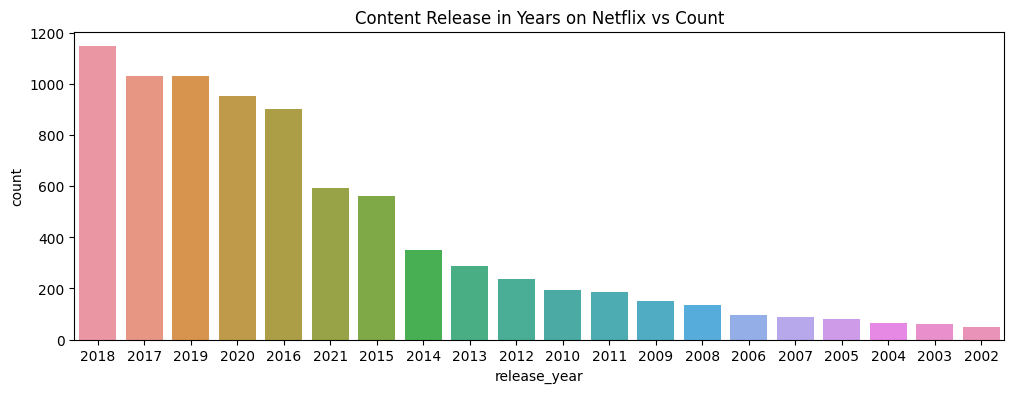

In [48]:
plt.figure(figsize = (12,4))
sns.countplot(x='release_year', order = df['release_year'].value_counts().index[0:20], data =df)
plt.title('Content Release in Years on Netflix vs Count')

**Genre Analysis**

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

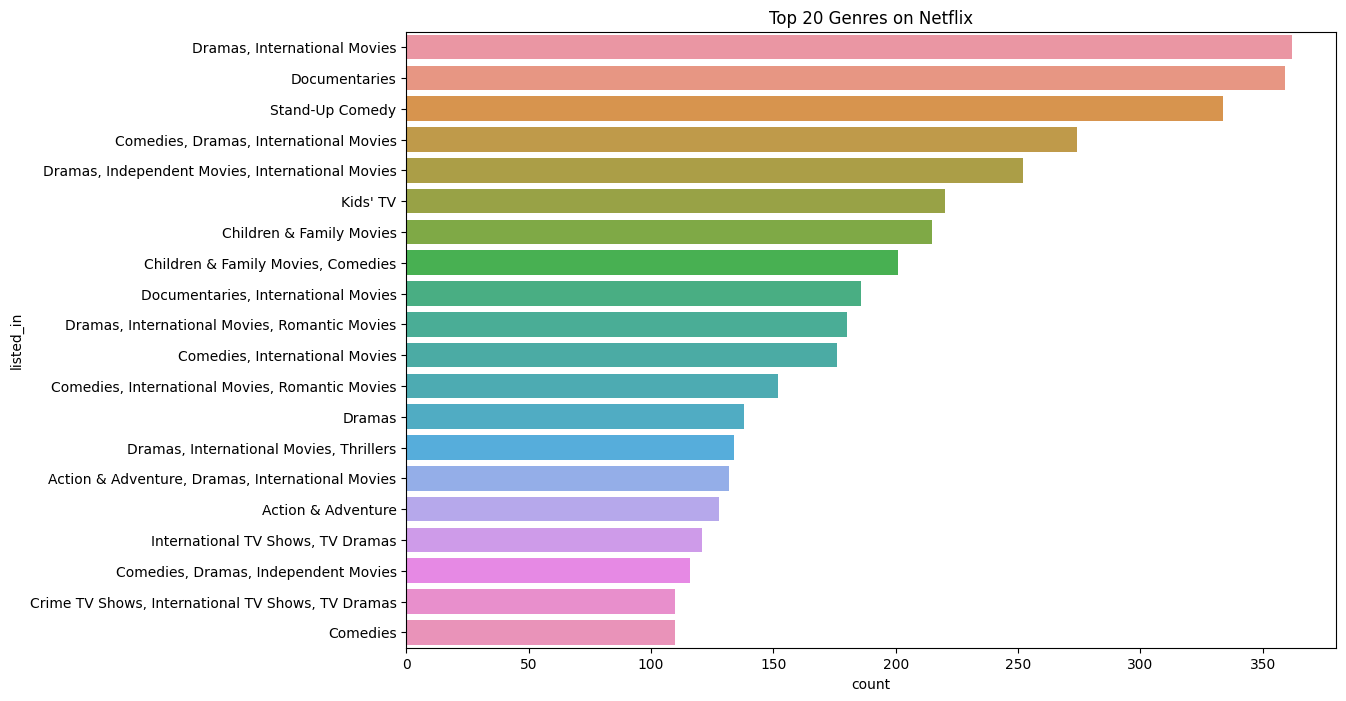

In [49]:
plt.figure(figsize = (12,8))
sns.countplot(y='listed_in', order = df['listed_in'].value_counts().index[0:20], data =df)
plt.title('Top 20 Genres on Netflix')

# **Sentiment Analysis**

In [50]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial= TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name= 'Count of Contents')

df3 = df3[df3['Release Year']>1990]

SentAnlys =  px.bar(df3, x = 'Release Year', y = 'Count of Contents', color = 'Sentiment', title = 'Sentiment Analysis of Netflix Contents')
SentAnlys.show()



**Summary**

We have performed various analysis over the data set to find varios insights and usefull information. The goal was to extract actionable insights that would inform strategic decision-making and enhance the overall user experience on the platform.
From the analysis we can say that:

*   Netflix has more Movies than TV Shows.
*   Most number of Movies & Tv Shows are produced by United States, followed by India which have produced the secind most number of Movies on Netflix.
*   Most of the Content on Netflix(Movies & Tv Shows) is for Mature Audiences.
*   2018 is the year in which more number of contents are released in Netflix compared to other years and 2018 also had the most number of positive sentiment contents.
*   International Movie and Drame are the most popular Genres on Netflix.
*   Anupham Kher is the Actor who have more number of contents released on Netflix with the count of 39.
*   Rajiv Chilaka is the Director who have more number of contents released on Netflix with the count of 22.









